In [1]:
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px
from dash.dependencies import Input, Output


In [2]:
df = pd.read_csv("penguins.csv")

In [4]:
app = dash.Dash(__name__, suppress_callback_exceptions=True)


In [7]:
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
import pandas as pd
import plotly.express as px
from dash.dependencies import Input, Output

# Initialize Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout
app.layout = dbc.Container([
    html.H1("Penguins Dataset Interactive Dashboard", className="text-center mb-4"),
    
    # Dropdowns for interactive plots
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='x-axis',
                options=[{'label': col, 'value': col} for col in df.select_dtypes(include=['float64', 'int64']).columns],
                value='bill_length_mm',
                clearable=False
            )
        ], width=6),
        
        dbc.Col([
            dcc.Dropdown(
                id='y-axis',
                options=[{'label': col, 'value': col} for col in df.select_dtypes(include=['float64', 'int64']).columns],
                value='bill_depth_mm',
                clearable=False
            )
        ], width=6)
    ]),

    # Graphs
    dbc.Row([
        dbc.Col(dcc.Graph(id='scatter-plot'), width=6),
        dbc.Col(dcc.Graph(id='histogram'), width=6),
    ]),
    
    dbc.Row([
        dbc.Col(dcc.Graph(id='box-plot'), width=6),
        dbc.Col(dcc.Graph(id='violin-plot'), width=6),
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='heatmap'), width=6),
        dbc.Col(dcc.Graph(id='bar-chart'), width=6),
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='pair-plot'), width=6),
        dbc.Col(dcc.Graph(id='density-contour'), width=6),
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='sunburst-chart'), width=6),
    ]),

], fluid=True)

# Callbacks

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-axis', 'value'),
     Input('y-axis', 'value')]
)
def update_scatter(x_axis, y_axis):
    return px.scatter(df, x=x_axis, y=y_axis, color='species', title=f'{x_axis} vs {y_axis}')

@app.callback(
    Output('histogram', 'figure'),
    [Input('x-axis', 'value')]
)
def update_histogram(x_axis):
    return px.histogram(df, x=x_axis, color='species', title=f'Distribution of {x_axis}')

@app.callback(
    Output('box-plot', 'figure'),
    [Input('x-axis', 'value')]
)
def update_box_plot(x_axis):
    return px.box(df, x='species', y=x_axis, color='species', title=f'Box Plot of {x_axis} by Species')

@app.callback(
    Output('violin-plot', 'figure'),
    [Input('x-axis', 'value')]
)
def update_violin_plot(x_axis):
    return px.violin(df, x='species', y=x_axis, color='species', title=f'Violin Plot of {x_axis} by Species')

@app.callback(
    Output('heatmap', 'figure'),
    [Input('x-axis', 'value')]  # ✅ Adding an input to trigger callback
)
def update_heatmap(x_axis):
    return px.imshow(df.corr(), title='Feature Correlation Heatmap', color_continuous_scale='Viridis')

@app.callback(
    Output('bar-chart', 'figure'),
    [Input('x-axis', 'value')]
)
def update_bar_chart(x_axis):
    return px.bar(df, x='species', y=x_axis, color='species', title=f'Bar Chart of {x_axis} by Species')

@app.callback(
    Output('pair-plot', 'figure'),
    [Input('x-axis', 'value')]  # ✅ Adding an input to trigger callback
)
def update_pair_plot(x_axis):
    return px.scatter_matrix(df, dimensions=df.select_dtypes(include=['float64', 'int64']).columns, color='species', title='Pair Plot of Features')

@app.callback(
    Output('density-contour', 'figure'),
    [Input('x-axis', 'value'), Input('y-axis', 'value')]
)
def update_density_contour(x_axis, y_axis):
    return px.density_contour(df, x=x_axis, y=y_axis, color='species', title=f'Density Contour of {x_axis} vs {y_axis}')

@app.callback(
    Output('sunburst-chart', 'figure'),
    [Input('x-axis', 'value')]  # ✅ Adding an input to trigger callback
)
def update_sunburst(x_axis):
    return px.sunburst(df, path=['species', 'island'], values='body_mass_g', title='Sunburst Chart of Penguins')

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)


   Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0           1  Adelie  Torgersen            39.1           18.7   
1           2  Adelie  Torgersen            39.5           17.4   
2           3  Adelie  Torgersen            40.3           18.0   
3           4  Adelie  Torgersen             NaN            NaN   
4           5  Adelie  Torgersen            36.7           19.3   

   flipper_length_mm  body_mass_g     sex  year  
0              181.0       3750.0    male  2007  
1              186.0       3800.0  female  2007  
2              195.0       3250.0  female  2007  
3                NaN          NaN     NaN  2007  
4              193.0       3450.0  female  2007  
Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
D

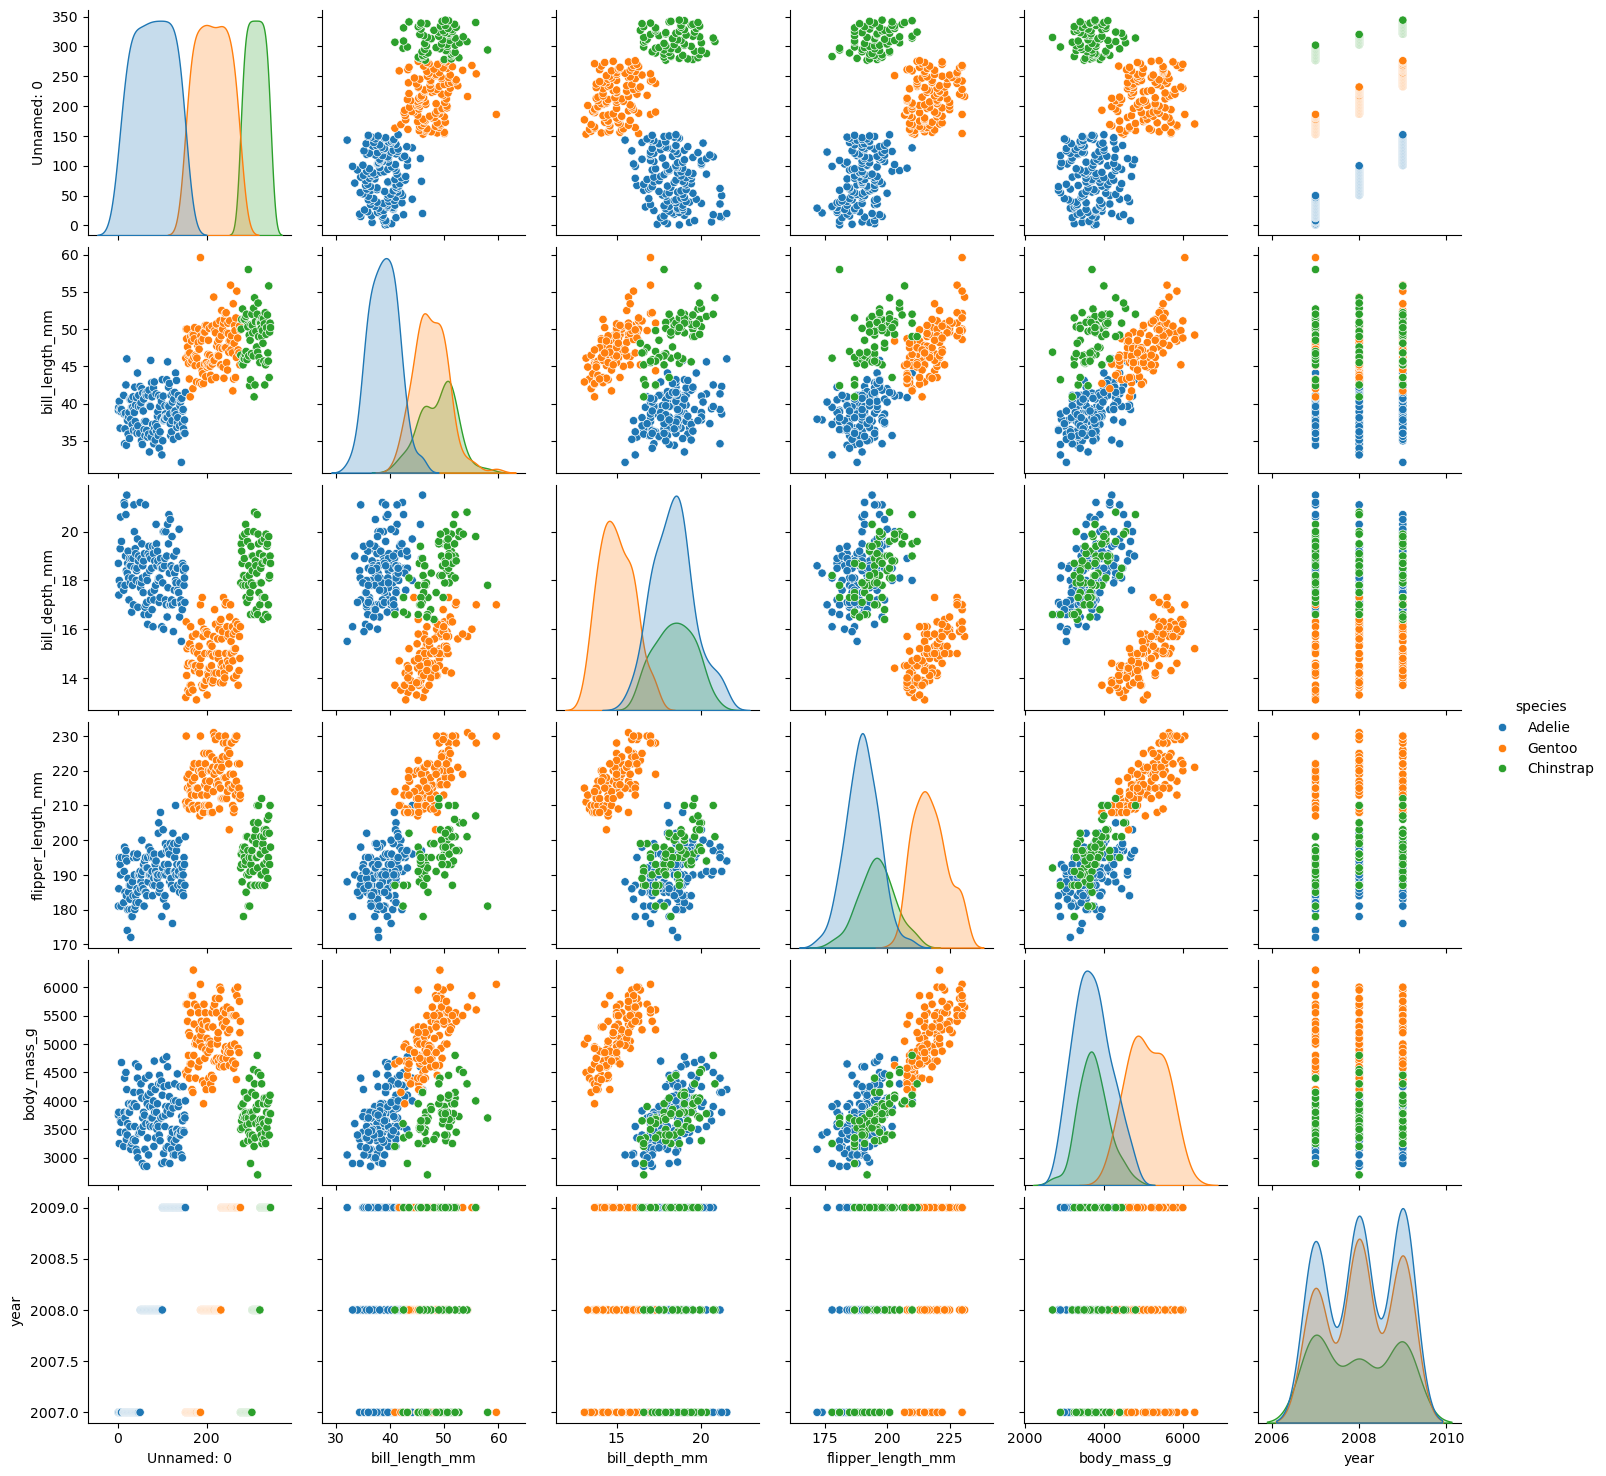

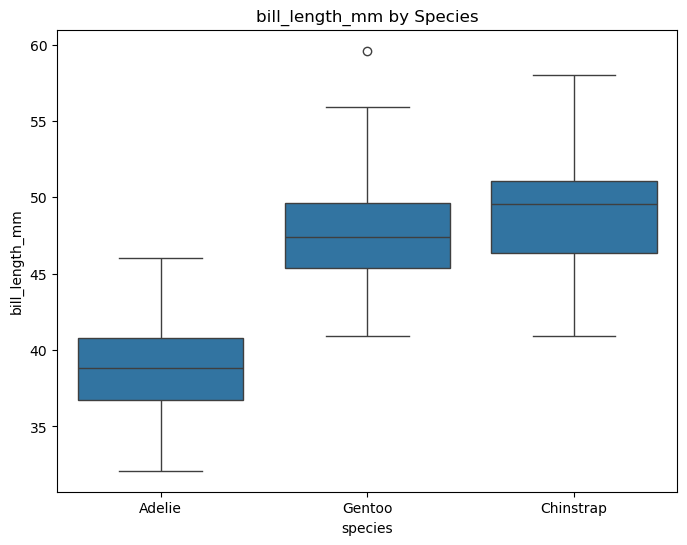

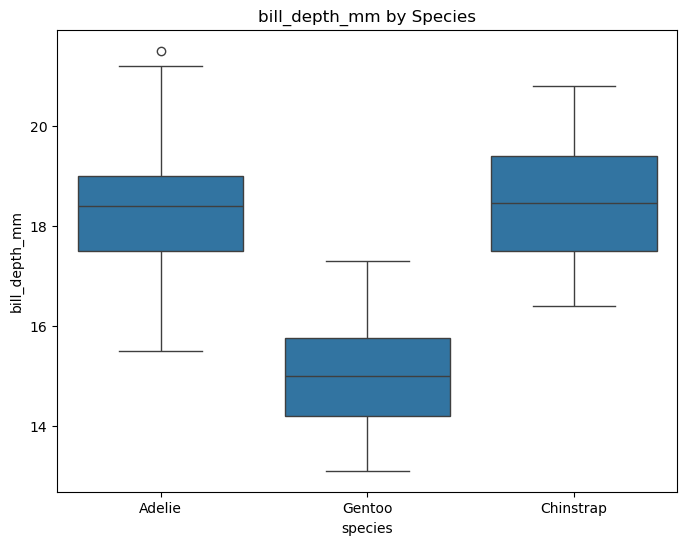

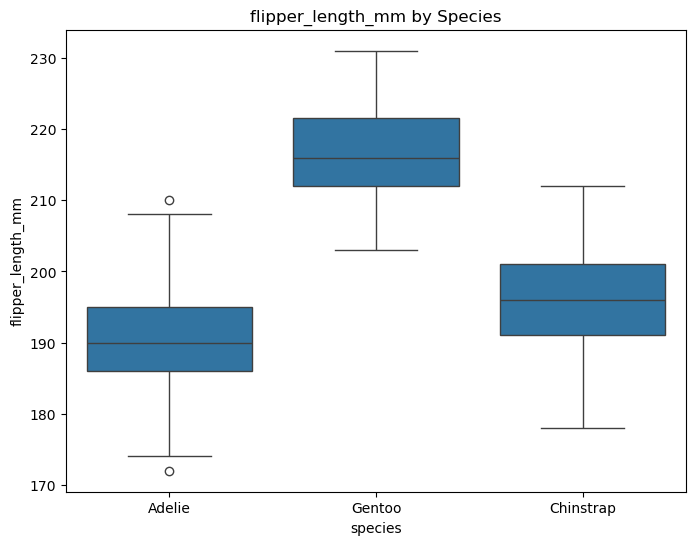

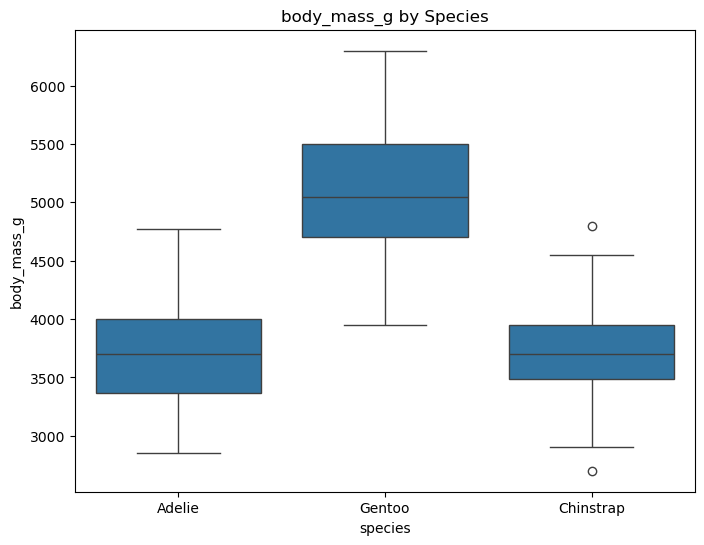

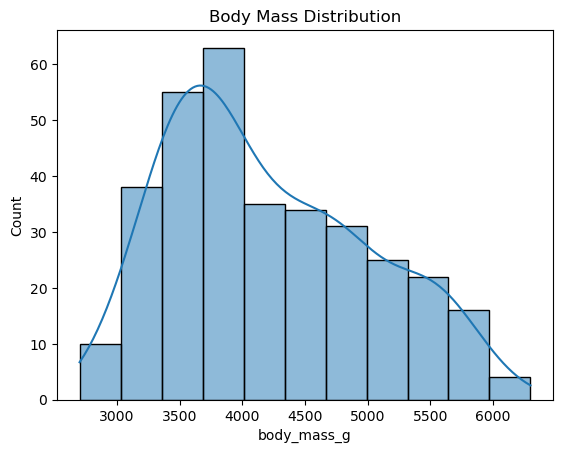

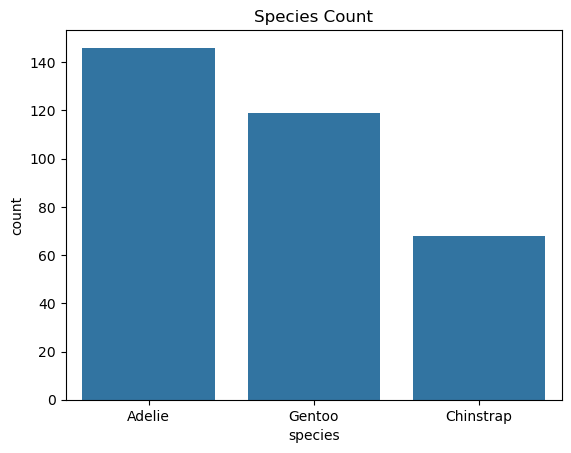

TypeError: agg function failed [how->mean,dtype->object]

In [9]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 2: Load the dataset
df = pd.read_csv("penguins.csv")
print(df.head())

# Step 3: Check for missing values and clean the data
print(df.isnull().sum())
df_clean = df.dropna()  # Drop rows with any missing values

# Step 4: Display basic information about the dataframe
print(df_clean.info())
print(df_clean.describe())  # Summary statistics

# Step 5: Explore categorical variables
print(df_clean['species'].value_counts())
print(df_clean['island'].value_counts())
print(df_clean['sex'].value_counts())

# Step 6: Visualize the data
# Pairplot to visualize relationships between features
sns.pairplot(df_clean, hue='species')
plt.show()

# Boxplots to compare measurements across species
for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='species', y=column, data=df_clean)
    plt.title(f'{column} by Species')
    plt.show()

# Histogram of body mass distribution
sns.histplot(df_clean['body_mass_g'], kde=True)
plt.title('Body Mass Distribution')
plt.show()

# Countplot of species distribution
sns.countplot(x='species', data=df_clean)
plt.title('Species Count')
plt.show()

# Step 7: Grouped analysis and statistical testing
# Group by species and island to compare measurements
species_group = df_clean.groupby(['species', 'island']).mean()
print(species_group)

# ANOVA to compare bill length across species
f_value, p_value = stats.f_oneway(
    df_clean[df_clean['species'] == 'Adelie']['bill_length_mm'],
    df_clean[df_clean['species'] == 'Gentoo']['bill_length_mm'],
    df_clean[df_clean['species'] == 'Chinstrap']['bill_length_mm']
)
print(f"ANOVA F-value: {f_value}, p-value: {p_value}")

# Step 8: Correlation matrix
corr_matrix = df_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 9: Predictive modeling (Regression: Predict body mass from bill length)
X = df_clean[['bill_length_mm']]
y = df_clean['body_mass_g']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Model R² score: {model.score(X_test, y_test):.2f}")

# Step 10: Predictive modeling (Classification: Species prediction)
X_class = df_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y_class = df_clean['species']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
model_class = RandomForestClassifier(random_state=42)
model_class.fit(X_train_class, y_train_class)

y_pred = model_class.predict(X_test_class)
print(f"Model accuracy: {accuracy_score(y_test_class, y_pred):.2f}")

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_class, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Step 11: Time series analysis (Trends over years)
yearly_means = df_clean.groupby('year').mean()
print(yearly_means)

plt.figure(figsize=(10, 6))
yearly_means[['bill_length_mm', 'body_mass_g']].plot(kind='line')
plt.title('Yearly Trends (2007-2009)')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.show()